# 인공지능과 가위바위보 하기

## 목차

### 1 최소한의 원본데이터 활용
#### 1.1 이미지 증강 image augmentation
#### 1.2 Data resize
#### 1.3 model 설계
#### 1.4 model 학습
#### 1.5 test dataset 생성

### 2 원본데이터 활용
#### 2.1 데이터 증강 image augmentation
#### 2.2 Data resize
#### 2.3 model 설계
#### 2.4 model 학습
#### 2.5 test dataset 생성

### 3 원본데이터 추가 후 학습

### 4 회고



## Image Augmentation

딥러닝 학습시 가장 큰 문제는 역시 Dataset을 구축하는 것 이다.아무리 많은 데이터를 모은다고 해도 시간이 너무 많이 소요되고 검증된 데이터도 아니기에 
신뢰도가 낮은경우가 많다.따라서 적은 데이터만으로 수천장,수만장으로 데이터를 늘릴수 있다.

본 프로젝트에선 최소한의 원본데이터를 사용한 모델과 원본데이터를 최대한 활용한 모델의 성능을 비교하고자 한다.
사용된 image augmetation기법으론 상하좌우 대칭,흑백,회전을 이용하였으나, 후에 resize 과정에서 channel 개수의 오류로 흑백과정은 생략하였다.
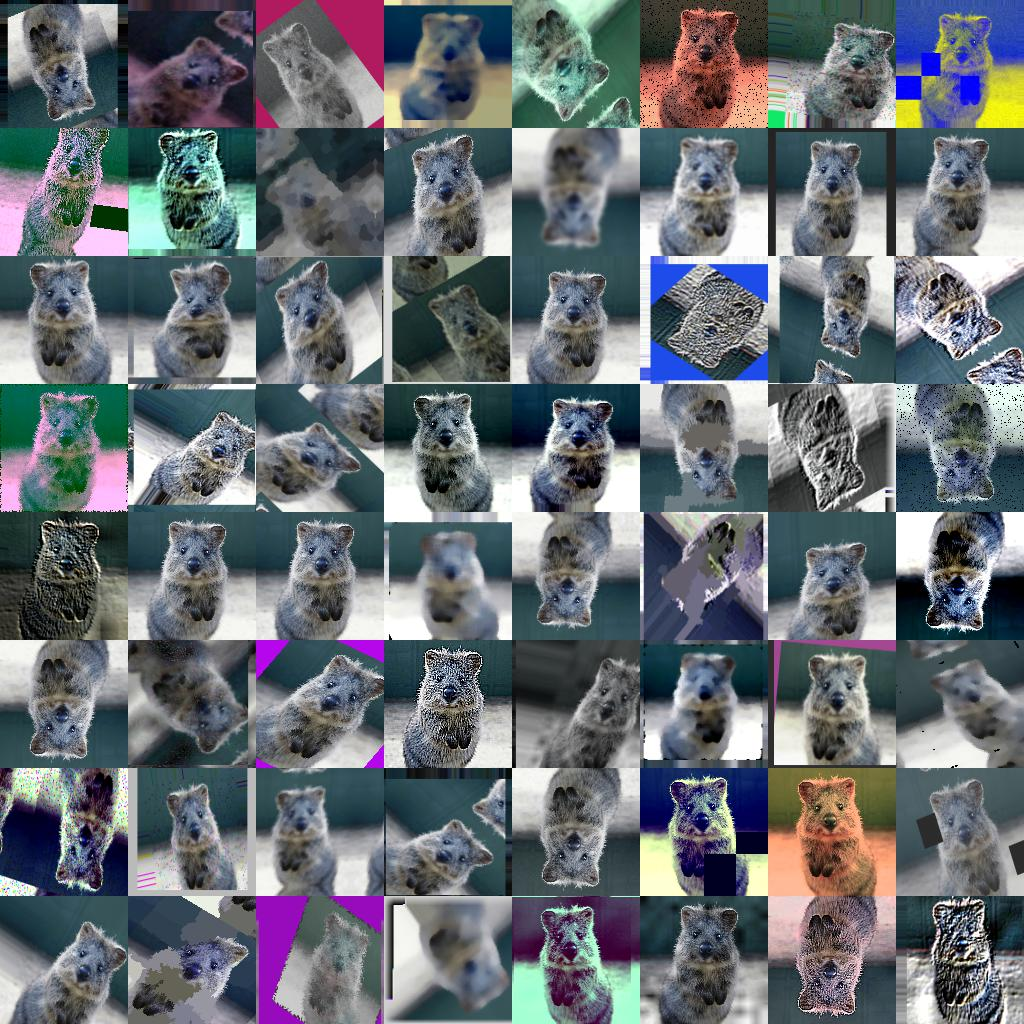


In [481]:
# import time
# import os
# from PIL import Image
# import sys

# print("Process Start.")

# start_time = time.time()

# # 부풀릴 이미지 입력
# image_filename = "./3.jpg"

# # 결과 저장 폴더 생성
# out_dir ="1"
# if out_dir not in os.listdir():
#     os.mkdir(out_dir)

# # 부풀릴 이미지 파일 불러오기
# image = Image.open(image_filename)
# Xdim, Ydim = image.size

# # 저장된 파일 개수 카운터
# COUNT = 1

# # 원본 저장
# # 저장할 파일의 이름을 입력합니다.
# temp_new_file_name = "%1d.png" %COUNT
# # 카운트를 1 증가시킵니다.
# COUNT += 1
# # 원본 이미지를 저장합니다.
# image.save(out_dir + "/" + temp_new_file_name)
# image.close()

# # 출력 파일명을 저장할 리스트를 만듭니다.
# FILELIST = [temp_new_file_name]

# # 폴더 내의 이미지를 모두 읽어와 좌우대칭을 저장합니다. 
# for i in range(len(FILELIST)):
#     # 파일을 불러옵니다.
#     image = Image.open(out_dir + "/" + FILELIST[i])
#     # 변환된 파일을 저장하기 위해 새로운 이름을 지정합니다.
#     new_temp_name = "%1d.png" %COUNT
#     # 사진이 한 장 만들어질때마다 count를 1씩 증가시킵니다.
#     COUNT += 1
#     # 이미지를 좌우 반전합니다.
#     image = image.transpose(Image.FLIP_LEFT_RIGHT)
#     # 좌우 반전된 이미지를 저장합니다.
#     image.save(out_dir + "/" + new_temp_name)
#     image.close()
#     # 출력 파일명을 리스트에 저장합니다.
#     FILELIST.append(new_temp_name)

# # 리스트 안의 이미지를 모두 읽어와 상하대칭을 저장합니다. 
# for i in range(len(FILELIST)):
#     # 파일을 불러옵니다.
#     image = Image.open(out_dir + "/" + FILELIST[i])
#     # 변환된 파일을 저장하기 위해 새로운 이름을 지정합니다.
#     new_temp_name = "%1d.png" % COUNT
#     # 사진이 한 장 만들어질때마다 count를 1씩 증가시킵니다.
#     COUNT += 1
#     # 이미지를 상하 반전합니다.
#     image = image.transpose(Image.FLIP_TOP_BOTTOM)
#     # 상하 반전된 이미지를 저장합니다.
#     image.save(out_dir + "/" + new_temp_name)
#     image.close()
#     # 출력 파일명을 리스트에 저장합니다.
#     FILELIST.append(new_temp_name)

# # 리스트 안의 이미지를 모두 읽어와 흑백버전을 저장합니다. 
# for i in range(len(FILELIST)):
#     # 파일을 불러옵니다.
#     image = Image.open(out_dir + "/" + FILELIST[i])
#     # 변환된 파일을 저장하기 위해 새로운 이름을 지정합니다.
#     new_temp_name = "%1d.png" % COUNT
#     # 사진이 한 장 만들어질때마다 count를 1씩 증가시킵니다.
#     COUNT += 1
#     # 이미지를 흑백으로 만듭니다.
#     image = image.convert('1')
#     # 흑백으로 변환된 이미지를 저장합니다.
#     image.save(out_dir + "/" + new_temp_name)
#     image.close()
#     # 출력 파일명을 리스트에 저장합니다.
#     FILELIST.append(new_temp_name)

# # 리스트 안의 이미지를 모두 읽어와 1도씩 회전합니다. 
# for el in FILELIST:
#     for i in range(180):
#         # 깔끔하게 1,000장만 만듭시다.
#         # 결과물이 1000개를 넘어서면 코드를 종료합니다.
#         if COUNT > 1000:
#             break
#         # 파일을 불러옵니다.
#         image = Image.open(out_dir + "/" + el)
#         # 변환된 파일을 저장하기 위해 새로운 이름을 지정합니다.
#         new_temp_name = "%1d.png" % COUNT
#         # 사진이 한 장 만들어질때마다 count를 1씩 증가시킵니다.
#         COUNT += 1
#         # 사진을 회전시킵니다.
#         image = image.rotate(i+1)
#         # 간혹 이미지 크기가 변경된다는 이야기가 있어 resize()를 실행합니다.
#         image = image.resize((Xdim, Ydim))
#         # 회전 된 이미지를 저장합니다.
#         image.save(out_dir + "/" + new_temp_name)
#         image.close()

# print("Process Done.")

# end_time = time.time()
# print("The Job Took " + str(end_time - start_time) + " seconds.")

#### Data resize

Image Augmentation을 진행한 데이터들에서  각 클래스별 28x28로 resize를 진행한다.

In [482]:
from PIL import Image
import glob
import os


def resize_images(img_path):
    images = glob.glob(img_path + "/*.png")
def resize_images(img_path):
    images = glob.glob(img_path + "/*.png")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "png")

    print(len(images), " images resized.")


# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/home/a/PycharmProjects/pythonProject/da/2'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

def resize_images(img_path):
    images = glob.glob(img_path + "/*.png")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "png")

    print(len(images), " images resized.")


# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/home/a/PycharmProjects/pythonProject/da/3'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

def resize_images(img_path):
    images = glob.glob(img_path + "/*.png")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "png")

    print(len(images), " images resized.")


# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/home/a/PycharmProjects/pythonProject/da/4'
resize_images(image_dir_path)

print("보 이미지 resize 완료!")
    
def resize_images(img_path):
    images = glob.glob(img_path + "/*.png")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "png")

    print(len(images), " images resized.")


724  images to be resized.
724  images resized.
가위 이미지 resize 완료!
724  images to be resized.
724  images resized.
바위 이미지 resize 완료!
724  images to be resized.
724  images resized.
보 이미지 resize 완료!


#### 학습 데이터 전처리
np zeros를 사용하여 img 데이터와 라벨 데이터를 담을 행렬을 생성하여 학습데이터를 구축한다.

학습데이터(x_train)의 이미지 개수는 2172 입니다.
x_train shape: (2172, 28, 28, 3)
y_train shape: (2172,)
라벨:  0


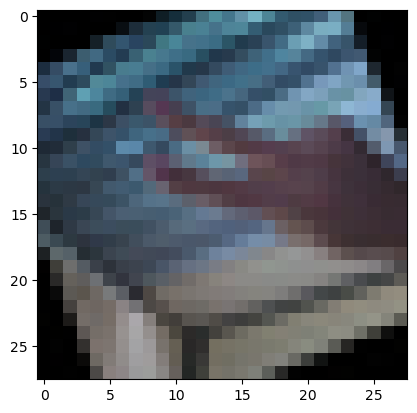

In [483]:
import  numpy as np
import matplotlib.pyplot as plt

def load_data(img_path, number_of_data=2172):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size = 28
    color = 3
    # 이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data, img_size,
                                                                                          img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    idx = 0
    for file in glob.iglob('/home/a/PycharmProjects/pythonProject/da/2/*.png'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0  # 가위 : 0
        idx = idx + 1

    for file in glob.iglob('/home/a/PycharmProjects/pythonProject/da/3/*.png'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1  # 바위 : 1
        idx = idx + 1

    for file in glob.iglob('/home/a/PycharmProjects/pythonProject/da/4/*.png'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 2  # 보 : 2
        idx = idx + 1

    print("학습데이터(x_train)의 이미지 개수는", idx, "입니다.")
    return imgs, labels


image_dir_path =' /home/a/PycharmProjects/pythonProject/da/'
(x_train, y_train) = load_data(image_dir_path)
x_train_norm = x_train / 255.0  # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

plt.imshow(x_train[120])
print('라벨: ', y_train[100])


#### model설계

In [484]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [485]:
model.summary()

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_126 (Conv2D)         (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_126 (MaxPooli  (None, 13, 13, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_127 (Conv2D)         (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_127 (MaxPooli  (None, 5, 5, 32)         0         
 ng2D)                                                           
                                                                 
 flatten_63 (Flatten)        (None, 800)               0         
                                                                 
 dense_126 (Dense)           (None, 32)              

#### model학습

In [486]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [487]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
68/68 [==============================] - 0s 1ms/step - loss: 3.4886 - accuracy: 0.5138
Epoch 2/10
68/68 [==============================] - 0s 2ms/step - loss: 0.1870 - accuracy: 0.9480
Epoch 3/10
68/68 [==============================] - 0s 2ms/step - loss: 0.0271 - accuracy: 0.9986
Epoch 4/10
68/68 [==============================] - 0s 2ms/step - loss: 0.0083 - accuracy: 1.0000
Epoch 5/10
68/68 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 6/10
68/68 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 7/10
68/68 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 8/10
68/68 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 9/10
68/68 [==============================] - 0s 2ms/step - loss: 8.6141e-04 - accuracy: 1.0000
Epoch 10/10
68/68 [==============================] - 0s 2ms/step - loss: 6.9750e-04 - accuracy: 1.0000


#### test dataset 생성
train dataset을 생성했던것과 같은 방법으로 생성해준다.


In [488]:
from PIL import Image
import glob
import os


def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "jpeg")

    print(len(images), " images resized.")


# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/home/a/PycharmProjects/pythonProject/te/sci'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "jpeg")

    print(len(images), " images resized.")



image_dir_path = '/home/a/PycharmProjects/pythonProject/te/ro'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "jpeg")

    print(len(images), " images resized.")



image_dir_path = '/home/a/PycharmProjects/pythonProject/te/pa'
resize_images(image_dir_path)

print("보 이미지 resize 완료!")
    
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "jpeg")

    print(len(images), " images resized.")

141  images to be resized.
141  images resized.
가위 이미지 resize 완료!
142  images to be resized.
142  images resized.
바위 이미지 resize 완료!
141  images to be resized.
141  images resized.
보 이미지 resize 완료!


학습데이터(x_test)의 이미지 개수는 424 입니다.
x_test shape: (424, 28, 28, 3)
y_test shape: (424,)
라벨:  0


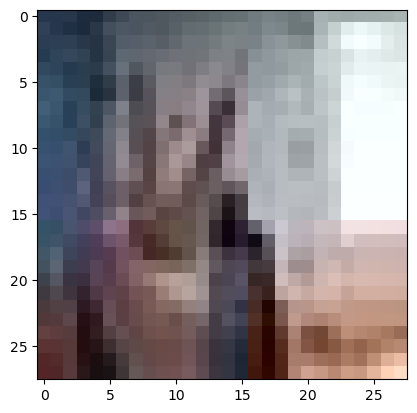

In [489]:
import  numpy as np
import matplotlib.pyplot as plt

def load_data(img_path, number_of_data=424):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size = 28
    color = 3
    # 이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data, img_size,
                                                                                          img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    idx = 0
    for file in glob.iglob('/home/a/PycharmProjects/pythonProject/te/sci/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0  # 가위 : 0
        idx = idx + 1

    for file in glob.iglob('/home/a/PycharmProjects/pythonProject/te/ro/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1  # 바위 : 1
        idx = idx + 1

    for file in glob.iglob('/home/a/PycharmProjects/pythonProject/te/pa/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 2  # 보 : 2
        idx = idx + 1

    print("학습데이터(x_test)의 이미지 개수는", idx, "입니다.")
    return imgs, labels


image_dir_path =' /home/a/PycharmProjects/pythonProject/te/'
(x_test, y_test) = load_data(image_dir_path)
x_test_norm = x_test / 255.0  # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

plt.imshow(x_test[120])
print('라벨: ', y_test[100])

In [490]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [491]:
model.summary()

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_128 (Conv2D)         (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_128 (MaxPooli  (None, 13, 13, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_129 (Conv2D)         (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_129 (MaxPooli  (None, 5, 5, 32)         0         
 ng2D)                                                           
                                                                 
 flatten_64 (Flatten)        (None, 800)               0         
                                                                 
 dense_128 (Dense)           (None, 32)              

In [492]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [493]:
model.fit(x_test, y_test, epochs=10)

Epoch 1/10
14/14 [==============================] - 0s 2ms/step - loss: 8.4991 - accuracy: 0.5425
Epoch 2/10
14/14 [==============================] - 0s 2ms/step - loss: 0.9045 - accuracy: 0.7854
Epoch 3/10
14/14 [==============================] - 0s 2ms/step - loss: 0.2833 - accuracy: 0.9057
Epoch 4/10
14/14 [==============================] - 0s 2ms/step - loss: 0.0772 - accuracy: 0.9670
Epoch 5/10
14/14 [==============================] - 0s 2ms/step - loss: 0.0194 - accuracy: 0.9906
Epoch 6/10
14/14 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 7/10
14/14 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 8/10
14/14 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 9/10
14/14 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 10/10
14/14 [==============================] - 0s 2ms/step - loss: 8.3144e-04 - accuracy: 1.0000


In [494]:
test_loss, test_accuracy = model.evaluate(x_train, y_train, verbose=2)

68/68 - 0s - loss: 7.1454 - accuracy: 0.3738 - 127ms/epoch - 2ms/step


#### 원본데이터를 6장 활용한 모델은 정말 형편없는 정확도를 보여준다. 
#### 따라서 다음 단계에선 원본데이터를 최대한 활용한 모델을 설계해보고 차이점을 보고자 한다.

### 원본데이터를 최대한 활용한 모델 설계

원본데이터는 각 class별로 100장씩 있고 전 단계에서 학습한 모델의 개수는 각 class별로 714장이였으므로 동일한 학습 데이터 수로 imgaug를 진행 하였다.

In [495]:
import time
import os
from PIL import Image
import sys

print("Process Start.")

start_time = time.time()

# 부풀릴 이미지 입력
#image_filename = "/home/a/PycharmProjects/pythonProject/da1/mook/3.jpg"
#image_filename = "/home/a/PycharmProjects/pythonProject/da1/ppa/3.jpg"
image_filename = "/home/a/PycharmProjects/pythonProject/da1/zzi/3.jpg"
# 결과 저장 폴더 생성
out_dir ="zi"
if out_dir not in os.listdir():
    os.mkdir(out_dir)

# 부풀릴 이미지 파일 불러오기
image = Image.open(image_filename)
Xdim, Ydim = image.size

# 저장된 파일 개수 카운터
COUNT = 1

# 원본 저장
# 저장할 파일의 이름을 입력합니다.
temp_new_file_name = "%0.5d.jpg" %COUNT
# 카운트를 1 증가시킵니다.
COUNT += 1
# 원본 이미지를 저장합니다.
image.save(out_dir + "/" + temp_new_file_name)
image.close()

# 출력 파일명을 저장할 리스트를 만듭니다.
FILELIST = [temp_new_file_name]

# 폴더 내의 이미지를 모두 읽어와 좌우대칭을 저장합니다. 
for i in range(len(FILELIST)):
    # 파일을 불러옵니다.
    image = Image.open(out_dir + "/" + FILELIST[i])
    # 변환된 파일을 저장하기 위해 새로운 이름을 지정합니다.
    new_temp_name = "%0.5d.jpg" %COUNT
    # 사진이 한 장 만들어질때마다 count를 1씩 증가시킵니다.
    COUNT += 1
    # 이미지를 좌우 반전합니다.
    image = image.transpose(Image.FLIP_LEFT_RIGHT)
    # 좌우 반전된 이미지를 저장합니다.
    image.save(out_dir + "/" + new_temp_name)
    image.close()
    # 출력 파일명을 리스트에 저장합니다.
    FILELIST.append(new_temp_name)

# 리스트 안의 이미지를 모두 읽어와 상하대칭을 저장합니다. 
for i in range(len(FILELIST)):
    # 파일을 불러옵니다.
    image = Image.open(out_dir + "/" + FILELIST[i])
    # 변환된 파일을 저장하기 위해 새로운 이름을 지정합니다.
    new_temp_name = "%0.5d.jpg" % COUNT
    # 사진이 한 장 만들어질때마다 count를 1씩 증가시킵니다.
    COUNT += 1
    # 이미지를 상하 반전합니다.
    image = image.transpose(Image.FLIP_TOP_BOTTOM)
    # 상하 반전된 이미지를 저장합니다.
    image.save(out_dir + "/" + new_temp_name)
    image.close()
    # 출력 파일명을 리스트에 저장합니다.
    FILELIST.append(new_temp_name)

# # 리스트 안의 이미지를 모두 읽어와 흑백버전을 저장합니다. 
# for i in range(len(FILELIST)):
#     # 파일을 불러옵니다.
#     image = Image.open(out_dir + "/" + FILELIST[i])
#     # 변환된 파일을 저장하기 위해 새로운 이름을 지정합니다.
#     new_temp_name = "%1d.png" % COUNT
#     # 사진이 한 장 만들어질때마다 count를 1씩 증가시킵니다.
#     COUNT += 1
#     # 이미지를 흑백으로 만듭니다.
#     image = image.convert('1')
#     # 흑백으로 변환된 이미지를 저장합니다.
#     image.save(out_dir + "/" + new_temp_name)
#     image.close()
#     # 출력 파일명을 리스트에 저장합니다.
#     FILELIST.append(new_temp_name)

# 리스트 안의 이미지를 모두 읽어와 1도씩 회전합니다. 
for el in FILELIST:
    for i in range(180):
        
        # 결과물이 614개를 넘어서면 코드를 종료합니다.
        if COUNT > 614:
            break
        # 파일을 불러옵니다.
        image = Image.open(out_dir + "/" + el)
        # 변환된 파일을 저장하기 위해 새로운 이름을 지정합니다.
        new_temp_name = "%0.5d.jpg" % COUNT
        # 사진이 한 장 만들어질때마다 count를 1씩 증가시킵니다.
        COUNT += 1
        # 사진을 회전시킵니다.
        image = image.rotate(i+1)
        # 간혹 이미지 크기가 변경된다는 이야기가 있어 resize()를 실행합니다.
        image = image.resize((Xdim, Ydim))
        # 회전 된 이미지를 저장합니다.
        image.save(out_dir + "/" + new_temp_name)
        image.close()

print("Process Done.")

end_time = time.time()
print("The Job Took " + str(end_time - start_time) + " seconds.")

Process Start.
Process Done.
The Job Took 0.8666887283325195 seconds.


In [496]:
import time
import os
from PIL import Image
import sys

print("Process Start.")

start_time = time.time()

# 부풀릴 이미지 입력
#image_filename = "/home/a/PycharmProjects/pythonProject/da1/mook/3.jpg"
image_filename = "/home/a/PycharmProjects/pythonProject/da1/ppa/3.jpg"
#image_filename = "/home/a/PycharmProjects/pythonProject/da1/zzi/3.jpg"
# 결과 저장 폴더 생성
out_dir ="pa"
if out_dir not in os.listdir():
    os.mkdir(out_dir)

# 부풀릴 이미지 파일 불러오기
image = Image.open(image_filename)
Xdim, Ydim = image.size

# 저장된 파일 개수 카운터
COUNT = 1

# 원본 저장
# 저장할 파일의 이름을 입력합니다.
temp_new_file_name = "%0.5d.jpg" %COUNT
# 카운트를 1 증가시킵니다.
COUNT += 1
# 원본 이미지를 저장합니다.
image.save(out_dir + "/" + temp_new_file_name)
image.close()

# 출력 파일명을 저장할 리스트를 만듭니다.
FILELIST = [temp_new_file_name]

# 폴더 내의 이미지를 모두 읽어와 좌우대칭을 저장합니다. 
for i in range(len(FILELIST)):
    # 파일을 불러옵니다.
    image = Image.open(out_dir + "/" + FILELIST[i])
    # 변환된 파일을 저장하기 위해 새로운 이름을 지정합니다.
    new_temp_name = "%0.5d.jpg" %COUNT
    # 사진이 한 장 만들어질때마다 count를 1씩 증가시킵니다.
    COUNT += 1
    # 이미지를 좌우 반전합니다.
    image = image.transpose(Image.FLIP_LEFT_RIGHT)
    # 좌우 반전된 이미지를 저장합니다.
    image.save(out_dir + "/" + new_temp_name)
    image.close()
    # 출력 파일명을 리스트에 저장합니다.
    FILELIST.append(new_temp_name)

# 리스트 안의 이미지를 모두 읽어와 상하대칭을 저장합니다. 
for i in range(len(FILELIST)):
    # 파일을 불러옵니다.
    image = Image.open(out_dir + "/" + FILELIST[i])
    # 변환된 파일을 저장하기 위해 새로운 이름을 지정합니다.
    new_temp_name = "%0.5d.jpg" % COUNT
    # 사진이 한 장 만들어질때마다 count를 1씩 증가시킵니다.
    COUNT += 1
    # 이미지를 상하 반전합니다.
    image = image.transpose(Image.FLIP_TOP_BOTTOM)
    # 상하 반전된 이미지를 저장합니다.
    image.save(out_dir + "/" + new_temp_name)
    image.close()
    # 출력 파일명을 리스트에 저장합니다.
    FILELIST.append(new_temp_name)

# # 리스트 안의 이미지를 모두 읽어와 흑백버전을 저장합니다. 
# for i in range(len(FILELIST)):
#     # 파일을 불러옵니다.
#     image = Image.open(out_dir + "/" + FILELIST[i])
#     # 변환된 파일을 저장하기 위해 새로운 이름을 지정합니다.
#     new_temp_name = "%1d.png" % COUNT
#     # 사진이 한 장 만들어질때마다 count를 1씩 증가시킵니다.
#     COUNT += 1
#     # 이미지를 흑백으로 만듭니다.
#     image = image.convert('1')
#     # 흑백으로 변환된 이미지를 저장합니다.
#     image.save(out_dir + "/" + new_temp_name)
#     image.close()
#     # 출력 파일명을 리스트에 저장합니다.
#     FILELIST.append(new_temp_name)

# 리스트 안의 이미지를 모두 읽어와 1도씩 회전합니다. 
for el in FILELIST:
    for i in range(180):
        
        # 결과물이 614개를 넘어서면 코드를 종료합니다.
        if COUNT > 614:
            break
        # 파일을 불러옵니다.
        image = Image.open(out_dir + "/" + el)
        # 변환된 파일을 저장하기 위해 새로운 이름을 지정합니다.
        new_temp_name = "%0.5d.jpg" % COUNT
        # 사진이 한 장 만들어질때마다 count를 1씩 증가시킵니다.
        COUNT += 1
        # 사진을 회전시킵니다.
        image = image.rotate(i+1)
        # 간혹 이미지 크기가 변경된다는 이야기가 있어 resize()를 실행합니다.
        image = image.resize((Xdim, Ydim))
        # 회전 된 이미지를 저장합니다.
        image.save(out_dir + "/" + new_temp_name)
        image.close()

print("Process Done.")

end_time = time.time()
print("The Job Took " + str(end_time - start_time) + " seconds.")

Process Start.
Process Done.
The Job Took 0.8638870716094971 seconds.


In [497]:
import time
import os
from PIL import Image
import sys

print("Process Start.")

start_time = time.time()

# 부풀릴 이미지 입력
image_filename = "/home/a/PycharmProjects/pythonProject/da1/mook/3.jpg"
#image_filename = "/home/a/PycharmProjects/pythonProject/da1/ppa/3.jpg"
#image_filename = "/home/a/PycharmProjects/pythonProject/da1/zzi/3.jpg"
# 결과 저장 폴더 생성
out_dir ="mo"
if out_dir not in os.listdir():
    os.mkdir(out_dir)

# 부풀릴 이미지 파일 불러오기
image = Image.open(image_filename)
Xdim, Ydim = image.size

# 저장된 파일 개수 카운터
COUNT = 1

# 원본 저장
# 저장할 파일의 이름을 입력합니다.
temp_new_file_name = "%0.5d.jpg" %COUNT
# 카운트를 1 증가시킵니다.
COUNT += 1
# 원본 이미지를 저장합니다.
image.save(out_dir + "/" + temp_new_file_name)
image.close()

# 출력 파일명을 저장할 리스트를 만듭니다.
FILELIST = [temp_new_file_name]

# 폴더 내의 이미지를 모두 읽어와 좌우대칭을 저장합니다. 
for i in range(len(FILELIST)):
    # 파일을 불러옵니다.
    image = Image.open(out_dir + "/" + FILELIST[i])
    # 변환된 파일을 저장하기 위해 새로운 이름을 지정합니다.
    new_temp_name = "%0.5d.jpg" %COUNT
    # 사진이 한 장 만들어질때마다 count를 1씩 증가시킵니다.
    COUNT += 1
    # 이미지를 좌우 반전합니다.
    image = image.transpose(Image.FLIP_LEFT_RIGHT)
    # 좌우 반전된 이미지를 저장합니다.
    image.save(out_dir + "/" + new_temp_name)
    image.close()
    # 출력 파일명을 리스트에 저장합니다.
    FILELIST.append(new_temp_name)

# 리스트 안의 이미지를 모두 읽어와 상하대칭을 저장합니다. 
for i in range(len(FILELIST)):
    # 파일을 불러옵니다.
    image = Image.open(out_dir + "/" + FILELIST[i])
    # 변환된 파일을 저장하기 위해 새로운 이름을 지정합니다.
    new_temp_name = "%0.5d.jpg" % COUNT
    # 사진이 한 장 만들어질때마다 count를 1씩 증가시킵니다.
    COUNT += 1
    # 이미지를 상하 반전합니다.
    image = image.transpose(Image.FLIP_TOP_BOTTOM)
    # 상하 반전된 이미지를 저장합니다.
    image.save(out_dir + "/" + new_temp_name)
    image.close()
    # 출력 파일명을 리스트에 저장합니다.
    FILELIST.append(new_temp_name)

# # 리스트 안의 이미지를 모두 읽어와 흑백버전을 저장합니다. 
# for i in range(len(FILELIST)):
#     # 파일을 불러옵니다.
#     image = Image.open(out_dir + "/" + FILELIST[i])
#     # 변환된 파일을 저장하기 위해 새로운 이름을 지정합니다.
#     new_temp_name = "%1d.png" % COUNT
#     # 사진이 한 장 만들어질때마다 count를 1씩 증가시킵니다.
#     COUNT += 1
#     # 이미지를 흑백으로 만듭니다.
#     image = image.convert('1')
#     # 흑백으로 변환된 이미지를 저장합니다.
#     image.save(out_dir + "/" + new_temp_name)
#     image.close()
#     # 출력 파일명을 리스트에 저장합니다.
#     FILELIST.append(new_temp_name)

# 리스트 안의 이미지를 모두 읽어와 1도씩 회전합니다. 
for el in FILELIST:
    for i in range(180):
        
        # 결과물이 614개를 넘어서면 코드를 종료합니다.
        if COUNT > 614:
            break
        # 파일을 불러옵니다.
        image = Image.open(out_dir + "/" + el)
        # 변환된 파일을 저장하기 위해 새로운 이름을 지정합니다.
        new_temp_name = "%0.5d.jpg" % COUNT
        # 사진이 한 장 만들어질때마다 count를 1씩 증가시킵니다.
        COUNT += 1
        # 사진을 회전시킵니다.
        image = image.rotate(i+1)
        # 간혹 이미지 크기가 변경된다는 이야기가 있어 resize()를 실행합니다.
        image = image.resize((Xdim, Ydim))
        # 회전 된 이미지를 저장합니다.
        image.save(out_dir + "/" + new_temp_name)
        image.close()

print("Process Done.")

end_time = time.time()
print("The Job Took " + str(end_time - start_time) + " seconds.")

Process Start.
Process Done.
The Job Took 0.8538973331451416 seconds.


#### imgaug가 잘 진행된걸 볼 수 있다

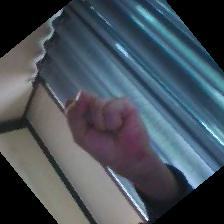


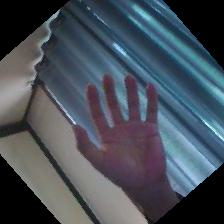

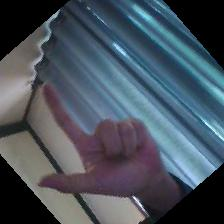

### img resize 진행

In [498]:
from PIL import Image
import glob
import os


def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "jpeg")

    print(len(images), " images resized.")


# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/home/a/PycharmProjects/pythonProject/2/zi'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "jpeg")

    print(len(images), " images resized.")


# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/home/a/PycharmProjects/pythonProject/2/mo'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "jpeg")

    print(len(images), " images resized.")


# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/home/a/PycharmProjects/pythonProject/2/pa'
resize_images(image_dir_path)

print("보 이미지 resize 완료!")
    
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "jpeg")

    print(len(images), " images resized.")


714  images to be resized.
714  images resized.
가위 이미지 resize 완료!
713  images to be resized.
713  images resized.
바위 이미지 resize 완료!
714  images to be resized.
714  images resized.
보 이미지 resize 완료!


학습데이터(x_train1)의 이미지 개수는 2141 입니다.
x_train1 shape: (2172, 28, 28, 3)
y_train1 shape: (2172,)
라벨:  2


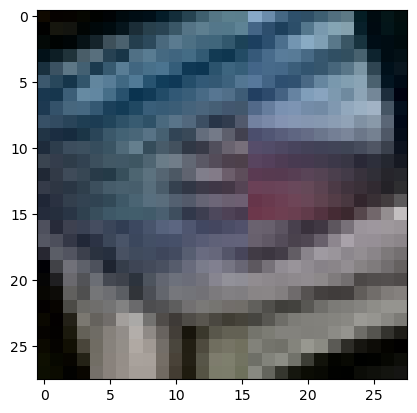

In [499]:
import  numpy as np
import matplotlib.pyplot as plt

def load_data(img_path, number_of_data=2172):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size = 28
    color = 3
    # 이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data, img_size,
                                                                                          img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    idx = 0
    for file in glob.iglob('/home/a/PycharmProjects/pythonProject/2/zi/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0  # 가위 : 0
        idx = idx + 1

    for file in glob.iglob('/home/a/PycharmProjects/pythonProject/2/mo/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1  # 바위 : 1
        idx = idx + 1

    for file in glob.iglob('/home/a/PycharmProjects/pythonProject/2/pa/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 2  # 보 : 2
        idx = idx + 1

    print("학습데이터(x_train1)의 이미지 개수는", idx, "입니다.")
    return imgs, labels


image_dir_path =' /home/a/PycharmProjects/pythonProject/2'
(x_train1, y_train1) = load_data(image_dir_path)
x_train1_norm = x_train1 / 255.0  # 입력은 0~1 사이의 값으로 정규화

print("x_train1 shape: {}".format(x_train1.shape))
print("y_train1 shape: {}".format(y_train1.shape))

plt.imshow(x_train1[1500])
print('라벨: ', y_train1[1500])


### model 설계

In [500]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [501]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [502]:
model.fit(x_train1, y_train1, epochs=10)

Epoch 1/10
68/68 [==============================] - 0s 1ms/step - loss: 4.2068 - accuracy: 0.4319
Epoch 2/10
68/68 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.7284
Epoch 3/10
68/68 [==============================] - 0s 2ms/step - loss: 0.3144 - accuracy: 0.8973
Epoch 4/10
68/68 [==============================] - 0s 2ms/step - loss: 0.1151 - accuracy: 0.9733
Epoch 5/10
68/68 [==============================] - 0s 2ms/step - loss: 0.0684 - accuracy: 0.9816
Epoch 6/10
68/68 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9917
Epoch 7/10
68/68 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9936
Epoch 8/10
68/68 [==============================] - 0s 2ms/step - loss: 0.0224 - accuracy: 0.9936
Epoch 9/10
68/68 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 0.9986
Epoch 10/10
68/68 [==============================] - 0s 2ms/step - loss: 0.0155 - accuracy: 0.9972


In [503]:
from PIL import Image
import glob
import os


def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "jpeg")

    print(len(images), " images resized.")


# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/home/a/PycharmProjects/pythonProject/te/sci'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "jpeg")

    print(len(images), " images resized.")



image_dir_path = '/home/a/PycharmProjects/pythonProject/te/ro'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "jpeg")

    print(len(images), " images resized.")



image_dir_path = '/home/a/PycharmProjects/pythonProject/te/pa'
resize_images(image_dir_path)

print("보 이미지 resize 완료!")
    
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "jpeg")

    print(len(images), " images resized.")

141  images to be resized.
141  images resized.
가위 이미지 resize 완료!
142  images to be resized.
142  images resized.
바위 이미지 resize 완료!
141  images to be resized.
141  images resized.
보 이미지 resize 완료!


학습데이터(x_test)의 이미지 개수는 424 입니다.
x_test shape: (424, 28, 28, 3)
y_test shape: (424,)
라벨:  0


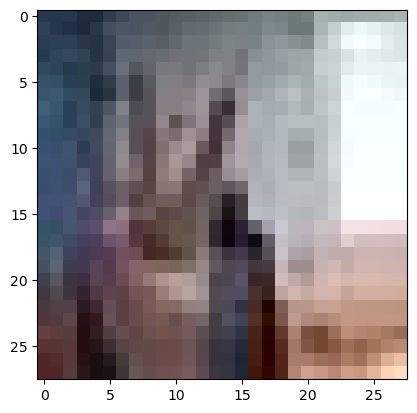

In [504]:
import  numpy as np
import matplotlib.pyplot as plt

def load_data(img_path, number_of_data=424):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size = 28
    color = 3
    # 이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data, img_size,
                                                                                          img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    idx = 0
    for file in glob.iglob('/home/a/PycharmProjects/pythonProject/te/sci/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0  # 가위 : 0
        idx = idx + 1

    for file in glob.iglob('/home/a/PycharmProjects/pythonProject/te/ro/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1  # 바위 : 1
        idx = idx + 1

    for file in glob.iglob('/home/a/PycharmProjects/pythonProject/te/pa/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 2  # 보 : 2
        idx = idx + 1

    print("학습데이터(x_test)의 이미지 개수는", idx, "입니다.")
    return imgs, labels


image_dir_path =' /home/a/PycharmProjects/pythonProject/te/'
(x_test, y_test) = load_data(image_dir_path)
x_test_norm = x_test / 255.0  # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

plt.imshow(x_test[120])
print('라벨: ', y_test[100])

In [505]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [506]:
model.summary()

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_132 (Conv2D)         (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_132 (MaxPooli  (None, 13, 13, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_133 (Conv2D)         (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_133 (MaxPooli  (None, 5, 5, 32)         0         
 ng2D)                                                           
                                                                 
 flatten_66 (Flatten)        (None, 800)               0         
                                                                 
 dense_132 (Dense)           (None, 32)              

In [507]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [508]:
test_loss, test_accuracy = model.evaluate(x_train1, y_train1, verbose=2)

68/68 - 0s - loss: 32.6474 - accuracy: 0.3425 - 162ms/epoch - 2ms/step


#### 원본데이터 140장과 augmentation을 진행한 데이터 614장을 학습한 model 역시 0.34의 정확도를 보여주며 전 단계과 별 차이를 보이지 않았다. 따라서 다음 단계에선 원본데이터를 더 늘리고 img  augmetation을 최소화 하여 진행해보겠다.

## 3. 원본데이터  5500장 imgaug 540장으로 진행

In [509]:
import time
import os
from PIL import Image
import sys

print("Process Start.")

start_time = time.time()

# 부풀릴 이미지 입력
image_filename = "/home/a/PycharmProjects/pythonProject/tra/roc/3.jpg"

# 결과 저장 폴더 생성
out_dir ="mo"
if out_dir not in os.listdir():
    os.mkdir(out_dir)

# 부풀릴 이미지 파일 불러오기
image = Image.open(image_filename)
Xdim, Ydim = image.size

# 저장된 파일 개수 카운터
COUNT = 1

# 원본 저장
# 저장할 파일의 이름을 입력합니다.
temp_new_file_name = "%0.5d.jpg" %COUNT
# 카운트를 1 증가시킵니다.
COUNT += 1
# 원본 이미지를 저장합니다.
image.save(out_dir + "/" + temp_new_file_name)
image.close()

# 출력 파일명을 저장할 리스트를 만듭니다.
FILELIST = [temp_new_file_name]

# # 폴더 내의 이미지를 모두 읽어와 좌우대칭을 저장합니다. 
# for i in range(len(FILELIST)):
#     # 파일을 불러옵니다.
#     image = Image.open(out_dir + "/" + FILELIST[i])
#     # 변환된 파일을 저장하기 위해 새로운 이름을 지정합니다.
#     new_temp_name = "%0.5d.jpg" %COUNT
#     # 사진이 한 장 만들어질때마다 count를 1씩 증가시킵니다.
#     COUNT += 1
#     # 이미지를 좌우 반전합니다.
#     image = image.transpose(Image.FLIP_LEFT_RIGHT)
#     # 좌우 반전된 이미지를 저장합니다.
#     image.save(out_dir + "/" + new_temp_name)
#     image.close()
#     # 출력 파일명을 리스트에 저장합니다.
#     FILELIST.append(new_temp_name)

# # 리스트 안의 이미지를 모두 읽어와 상하대칭을 저장합니다. 
# for i in range(len(FILELIST)):
#     # 파일을 불러옵니다.
#     image = Image.open(out_dir + "/" + FILELIST[i])
#     # 변환된 파일을 저장하기 위해 새로운 이름을 지정합니다.
#     new_temp_name = "%0.5d.jpg" % COUNT
#     # 사진이 한 장 만들어질때마다 count를 1씩 증가시킵니다.
#     COUNT += 1
#     # 이미지를 상하 반전합니다.
#     image = image.transpose(Image.FLIP_TOP_BOTTOM)
#     # 상하 반전된 이미지를 저장합니다.
#     image.save(out_dir + "/" + new_temp_name)
#     image.close()
#     # 출력 파일명을 리스트에 저장합니다.
#     FILELIST.append(new_temp_name)

# # 리스트 안의 이미지를 모두 읽어와 흑백버전을 저장합니다. 
# for i in range(len(FILELIST)):
#     # 파일을 불러옵니다.
#     image = Image.open(out_dir + "/" + FILELIST[i])
#     # 변환된 파일을 저장하기 위해 새로운 이름을 지정합니다.
#     new_temp_name = "%1d.png" % COUNT
#     # 사진이 한 장 만들어질때마다 count를 1씩 증가시킵니다.
#     COUNT += 1
#     # 이미지를 흑백으로 만듭니다.
#     image = image.convert('1')
#     # 흑백으로 변환된 이미지를 저장합니다.
#     image.save(out_dir + "/" + new_temp_name)
#     image.close()
#     # 출력 파일명을 리스트에 저장합니다.
#     FILELIST.append(new_temp_name)

# 리스트 안의 이미지를 모두 읽어와 1도씩 회전합니다. 
for el in FILELIST:
    for i in range(180):
        
        # 결과물이 614개를 넘어서면 코드를 종료합니다.
        if COUNT > 200:
            break
        # 파일을 불러옵니다.
        image = Image.open(out_dir + "/" + el)
        # 변환된 파일을 저장하기 위해 새로운 이름을 지정합니다.
        new_temp_name = "%0.5d.jpg" % COUNT
        # 사진이 한 장 만들어질때마다 count를 1씩 증가시킵니다.
        COUNT += 1
        # 사진을 회전시킵니다.
        image = image.rotate(i+1)
        # 간혹 이미지 크기가 변경된다는 이야기가 있어 resize()를 실행합니다.
        image = image.resize((Xdim, Ydim))
        # 회전 된 이미지를 저장합니다.
        image.save(out_dir + "/" + new_temp_name)
        image.close()

print("Process Done.")

end_time = time.time()
print("The Job Took " + str(end_time - start_time) + " seconds.")

Process Start.
Process Done.
The Job Took 0.036081552505493164 seconds.


In [510]:
import time
import os
from PIL import Image
import sys

print("Process Start.")

start_time = time.time()

# 부풀릴 이미지 입력
image_filename = "/home/a/PycharmProjects/pythonProject/tra/scis/3.jpg"

# 결과 저장 폴더 생성
out_dir ="sci"
if out_dir not in os.listdir():
    os.mkdir(out_dir)

# 부풀릴 이미지 파일 불러오기
image = Image.open(image_filename)
Xdim, Ydim = image.size

# 저장된 파일 개수 카운터
COUNT = 1

# 원본 저장
# 저장할 파일의 이름을 입력합니다.
temp_new_file_name = "%0.5d.jpg" %COUNT
# 카운트를 1 증가시킵니다.
COUNT += 1
# 원본 이미지를 저장합니다.
image.save(out_dir + "/" + temp_new_file_name)
image.close()

# 출력 파일명을 저장할 리스트를 만듭니다.
FILELIST = [temp_new_file_name]

# # 폴더 내의 이미지를 모두 읽어와 좌우대칭을 저장합니다. 
# for i in range(len(FILELIST)):
#     # 파일을 불러옵니다.
#     image = Image.open(out_dir + "/" + FILELIST[i])
#     # 변환된 파일을 저장하기 위해 새로운 이름을 지정합니다.
#     new_temp_name = "%0.5d.jpg" %COUNT
#     # 사진이 한 장 만들어질때마다 count를 1씩 증가시킵니다.
#     COUNT += 1
#     # 이미지를 좌우 반전합니다.
#     image = image.transpose(Image.FLIP_LEFT_RIGHT)
#     # 좌우 반전된 이미지를 저장합니다.
#     image.save(out_dir + "/" + new_temp_name)
#     image.close()
#     # 출력 파일명을 리스트에 저장합니다.
#     FILELIST.append(new_temp_name)

# # 리스트 안의 이미지를 모두 읽어와 상하대칭을 저장합니다. 
# for i in range(len(FILELIST)):
#     # 파일을 불러옵니다.
#     image = Image.open(out_dir + "/" + FILELIST[i])
#     # 변환된 파일을 저장하기 위해 새로운 이름을 지정합니다.
#     new_temp_name = "%0.5d.jpg" % COUNT
#     # 사진이 한 장 만들어질때마다 count를 1씩 증가시킵니다.
#     COUNT += 1
#     # 이미지를 상하 반전합니다.
#     image = image.transpose(Image.FLIP_TOP_BOTTOM)
#     # 상하 반전된 이미지를 저장합니다.
#     image.save(out_dir + "/" + new_temp_name)
#     image.close()
#     # 출력 파일명을 리스트에 저장합니다.
#     FILELIST.append(new_temp_name)

# # 리스트 안의 이미지를 모두 읽어와 흑백버전을 저장합니다. 
# for i in range(len(FILELIST)):
#     # 파일을 불러옵니다.
#     image = Image.open(out_dir + "/" + FILELIST[i])
#     # 변환된 파일을 저장하기 위해 새로운 이름을 지정합니다.
#     new_temp_name = "%1d.png" % COUNT
#     # 사진이 한 장 만들어질때마다 count를 1씩 증가시킵니다.
#     COUNT += 1
#     # 이미지를 흑백으로 만듭니다.
#     image = image.convert('1')
#     # 흑백으로 변환된 이미지를 저장합니다.
#     image.save(out_dir + "/" + new_temp_name)
#     image.close()
#     # 출력 파일명을 리스트에 저장합니다.
#     FILELIST.append(new_temp_name)

# 리스트 안의 이미지를 모두 읽어와 1도씩 회전합니다. 
for el in FILELIST:
    for i in range(180):
        
        # 결과물이 200개를 넘어서면 코드를 종료합니다.
        if COUNT > 200:
            break
        # 파일을 불러옵니다.
        image = Image.open(out_dir + "/" + el)
        # 변환된 파일을 저장하기 위해 새로운 이름을 지정합니다.
        new_temp_name = "%0.5d.jpg" % COUNT
        # 사진이 한 장 만들어질때마다 count를 1씩 증가시킵니다.
        COUNT += 1
        # 사진을 회전시킵니다.
        image = image.rotate(i+1)
        # 간혹 이미지 크기가 변경된다는 이야기가 있어 resize()를 실행합니다.
        image = image.resize((Xdim, Ydim))
        # 회전 된 이미지를 저장합니다.
        image.save(out_dir + "/" + new_temp_name)
        image.close()

print("Process Done.")

end_time = time.time()
print("The Job Took " + str(end_time - start_time) + " seconds.")

Process Start.
Process Done.
The Job Took 0.03345179557800293 seconds.


In [511]:
import time
import os
from PIL import Image
import sys

print("Process Start.")

start_time = time.time()

# 부풀릴 이미지 입력
image_filename = "/home/a/PycharmProjects/pythonProject/tra/pap/3.jpg"

# 결과 저장 폴더 생성
out_dir ="pape"
if out_dir not in os.listdir():
    os.mkdir(out_dir)

# 부풀릴 이미지 파일 불러오기
image = Image.open(image_filename)
Xdim, Ydim = image.size

# 저장된 파일 개수 카운터
COUNT = 1

# 원본 저장
# 저장할 파일의 이름을 입력합니다.
temp_new_file_name = "%0.5d.jpg" %COUNT
# 카운트를 1 증가시킵니다.
COUNT += 1
# 원본 이미지를 저장합니다.
image.save(out_dir + "/" + temp_new_file_name)
image.close()

# 출력 파일명을 저장할 리스트를 만듭니다.
FILELIST = [temp_new_file_name]

# # 폴더 내의 이미지를 모두 읽어와 좌우대칭을 저장합니다. 
# for i in range(len(FILELIST)):
#     # 파일을 불러옵니다.
#     image = Image.open(out_dir + "/" + FILELIST[i])
#     # 변환된 파일을 저장하기 위해 새로운 이름을 지정합니다.
#     new_temp_name = "%0.5d.jpg" %COUNT
#     # 사진이 한 장 만들어질때마다 count를 1씩 증가시킵니다.
#     COUNT += 1
#     # 이미지를 좌우 반전합니다.
#     image = image.transpose(Image.FLIP_LEFT_RIGHT)
#     # 좌우 반전된 이미지를 저장합니다.
#     image.save(out_dir + "/" + new_temp_name)
#     image.close()
#     # 출력 파일명을 리스트에 저장합니다.
#     FILELIST.append(new_temp_name)

# # 리스트 안의 이미지를 모두 읽어와 상하대칭을 저장합니다. 
# for i in range(len(FILELIST)):
#     # 파일을 불러옵니다.
#     image = Image.open(out_dir + "/" + FILELIST[i])
#     # 변환된 파일을 저장하기 위해 새로운 이름을 지정합니다.
#     new_temp_name = "%0.5d.jpg" % COUNT
#     # 사진이 한 장 만들어질때마다 count를 1씩 증가시킵니다.
#     COUNT += 1
#     # 이미지를 상하 반전합니다.
#     image = image.transpose(Image.FLIP_TOP_BOTTOM)
#     # 상하 반전된 이미지를 저장합니다.
#     image.save(out_dir + "/" + new_temp_name)
#     image.close()
#     # 출력 파일명을 리스트에 저장합니다.
#     FILELIST.append(new_temp_name)

# # 리스트 안의 이미지를 모두 읽어와 흑백버전을 저장합니다. 
# for i in range(len(FILELIST)):
#     # 파일을 불러옵니다.
#     image = Image.open(out_dir + "/" + FILELIST[i])
#     # 변환된 파일을 저장하기 위해 새로운 이름을 지정합니다.
#     new_temp_name = "%1d.png" % COUNT
#     # 사진이 한 장 만들어질때마다 count를 1씩 증가시킵니다.
#     COUNT += 1
#     # 이미지를 흑백으로 만듭니다.
#     image = image.convert('1')
#     # 흑백으로 변환된 이미지를 저장합니다.
#     image.save(out_dir + "/" + new_temp_name)
#     image.close()
#     # 출력 파일명을 리스트에 저장합니다.
#     FILELIST.append(new_temp_name)

# 리스트 안의 이미지를 모두 읽어와 1도씩 회전합니다. 
for el in FILELIST:
    for i in range(180):
        
        # 결과물이 200개를 넘어서면 코드를 종료합니다.
        if COUNT > 200:
            break
        # 파일을 불러옵니다.
        image = Image.open(out_dir + "/" + el)
        # 변환된 파일을 저장하기 위해 새로운 이름을 지정합니다.
        new_temp_name = "%0.5d.jpg" % COUNT
        # 사진이 한 장 만들어질때마다 count를 1씩 증가시킵니다.
        COUNT += 1
        # 사진을 회전시킵니다.
        image = image.rotate(i+1)
        # 간혹 이미지 크기가 변경된다는 이야기가 있어 resize()를 실행합니다.
        image = image.resize((Xdim, Ydim))
        # 회전 된 이미지를 저장합니다.
        image.save(out_dir + "/" + new_temp_name)
        image.close()

print("Process Done.")

end_time = time.time()
print("The Job Took " + str(end_time - start_time) + " seconds.")

Process Start.
Process Done.
The Job Took 0.032840728759765625 seconds.


In [512]:
from PIL import Image
import glob
import os


def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "jpeg")

    print(len(images), " images resized.")


# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/home/a/PycharmProjects/pythonProject/tra/scis'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "jpeg")

    print(len(images), " images resized.")


# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/home/a/PycharmProjects/pythonProject/tra/roc'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "jpeg")

    print(len(images), " images resized.")


# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/home/a/PycharmProjects/pythonProject/tra/pap'
resize_images(image_dir_path)

print("보 이미지 resize 완료!")
    
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "jpeg")

    print(len(images), " images resized.")


2218  images to be resized.
2218  images resized.
가위 이미지 resize 완료!
1924  images to be resized.
1924  images resized.
바위 이미지 resize 완료!
1910  images to be resized.
1910  images resized.
보 이미지 resize 완료!


학습데이터(x_train2)의 이미지 개수는 6052 입니다.
x_train2 shape: (6052, 28, 28, 3)
y_train2 shape: (6052,)
라벨:  0


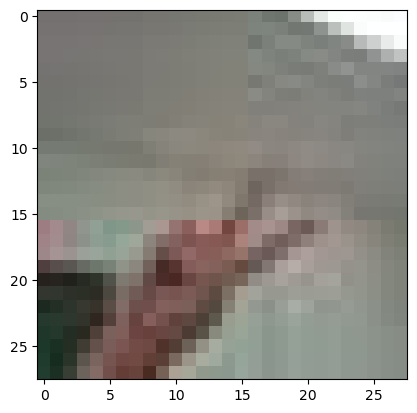

In [513]:
import  numpy as np
import matplotlib.pyplot as plt

def load_data(img_path, number_of_data=6052):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size = 28
    color = 3
    # 이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data, img_size,
                                                                                          img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    idx = 0
    for file in glob.iglob('/home/a/PycharmProjects/pythonProject/3/scis/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0  # 가위 : 0
        idx = idx + 1

    for file in glob.iglob('/home/a/PycharmProjects/pythonProject/3/roc/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1  # 바위 : 1
        idx = idx + 1

    for file in glob.iglob('/home/a/PycharmProjects/pythonProject/3/pap/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 2  # 보 : 2
        idx = idx + 1

    print("학습데이터(x_train2)의 이미지 개수는", idx, "입니다.")
    return imgs, labels


image_dir_path =' /home/a/PycharmProjects/pythonProject/2'
(x_train2, y_train2) = load_data(image_dir_path)
x_train2_norm = x_train2 / 255.0  # 입력은 0~1 사이의 값으로 정규화

print("x_train2 shape: {}".format(x_train2.shape))
print("y_train2 shape: {}".format(y_train2.shape))

plt.imshow(x_train2[1500])
print('라벨: ', y_train2[1500])


In [514]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [515]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [516]:
model.fit(x_train2, y_train2, epochs=10)

Epoch 1/10
190/190 [==============================] - 1s 2ms/step - loss: 4.4334 - accuracy: 0.5051
Epoch 2/10
190/190 [==============================] - 0s 2ms/step - loss: 0.7238 - accuracy: 0.7495
Epoch 3/10
190/190 [==============================] - 0s 2ms/step - loss: 0.4445 - accuracy: 0.8490
Epoch 4/10
190/190 [==============================] - 0s 2ms/step - loss: 0.2864 - accuracy: 0.9038
Epoch 5/10
190/190 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.9007
Epoch 6/10
190/190 [==============================] - 0s 2ms/step - loss: 0.1431 - accuracy: 0.9585
Epoch 7/10
190/190 [==============================] - 0s 2ms/step - loss: 0.1368 - accuracy: 0.9590
Epoch 8/10
190/190 [==============================] - 0s 2ms/step - loss: 0.0840 - accuracy: 0.9767
Epoch 9/10
190/190 [==============================] - 0s 2ms/step - loss: 0.0591 - accuracy: 0.9851
Epoch 10/10
190/190 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9860

#### test dataset 설정

In [517]:
from PIL import Image
import glob
import os


def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "jpeg")

    print(len(images), " images resized.")


# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/home/a/PycharmProjects/pythonProject/te/sci'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "jpeg")

    print(len(images), " images resized.")



image_dir_path = '/home/a/PycharmProjects/pythonProject/te/ro'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "jpeg")

    print(len(images), " images resized.")



image_dir_path = '/home/a/PycharmProjects/pythonProject/te/pa'
resize_images(image_dir_path)

print("보 이미지 resize 완료!")
    
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "jpeg")

    print(len(images), " images resized.")

141  images to be resized.
141  images resized.
가위 이미지 resize 완료!
142  images to be resized.
142  images resized.
바위 이미지 resize 완료!
141  images to be resized.
141  images resized.
보 이미지 resize 완료!


학습데이터(x_test)의 이미지 개수는 424 입니다.
x_test shape: (424, 28, 28, 3)
y_test shape: (424,)
라벨:  0


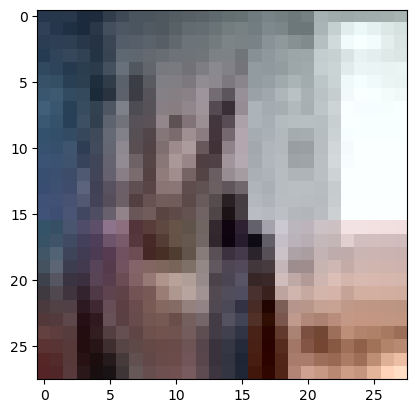

In [518]:
import  numpy as np
import matplotlib.pyplot as plt

def load_data(img_path, number_of_data=424):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size = 28
    color = 3
    # 이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data, img_size,
                                                                                          img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    idx = 0
    for file in glob.iglob('/home/a/PycharmProjects/pythonProject/te/sci/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0  # 가위 : 0
        idx = idx + 1

    for file in glob.iglob('/home/a/PycharmProjects/pythonProject/te/ro/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1  # 바위 : 1
        idx = idx + 1

    for file in glob.iglob('/home/a/PycharmProjects/pythonProject/te/pa/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 2  # 보 : 2
        idx = idx + 1

    print("학습데이터(x_test)의 이미지 개수는", idx, "입니다.")
    return imgs, labels


image_dir_path =' /home/a/PycharmProjects/pythonProject/te/'
(x_test, y_test) = load_data(image_dir_path)
x_test_norm = x_test / 255.0  # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

plt.imshow(x_test[120])
print('라벨: ', y_test[100])

In [519]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [520]:
model.summary()

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_136 (Conv2D)         (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_136 (MaxPooli  (None, 13, 13, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_137 (Conv2D)         (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_137 (MaxPooli  (None, 5, 5, 32)         0         
 ng2D)                                                           
                                                                 
 flatten_68 (Flatten)        (None, 800)               0         
                                                                 
 dense_136 (Dense)           (None, 32)              

In [521]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [524]:
test_loss, test_accuracy = model.evaluate(x_train2, y_train2, verbose=2)

190/190 - 0s - loss: 33.8007 - accuracy: 0.3174 - 181ms/epoch - 951us/step


## 4 회고

### 총 3단계로 학습을 진행해 보았다.imgaugmentation을 최대한 이용해보는것과 동일한 데이터 중 원본데이터만 최대한 이용하는것, 원본데이터를 크게 늘려 학습을 진행해 보았다.
### 그 결과 accuracy의 차이는 많이 없었으나 원본데이터를 많이 늘릴수록 overfitting을 피할수 있다는 것을 알 수 있었고, imgaugmentation을 너무 많이 사용해도 정확도의 향상엔 도움이 안된다는 것을 본 프로젝트를 통해 알 수 있었다.
### 본 프로젝트엔 내용이 없었으나 model 학습시 optimizer = SGD , loss = categorical_crossentropy를 사용시 value error, shape의 차이로 학습이 안되었다. 추후 이러한 error발생 이유를 찾아보겠다.
### 또한 optimizer = SGD, loss = sparse_categorical_crossentropy 로 model 학습시 여전히 정확도는 0.34정도로 산출되었는데 이러한 결과로 미루어보아 test dataset의 퀄리티가 안좋아 정확도가 낮게 나오는것일 수도 있다는 점을 의심해보았다.
